In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import string
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.layers import TextVectorization, Input, Embedding, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
df = pd.read_csv("../Data/IMDB Dataset.csv")
df.tail(3)

,review,sentiment
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
df.info()
# object -> 숫자로 변환해줘야함. label encoder
# negative : 0, positive : 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

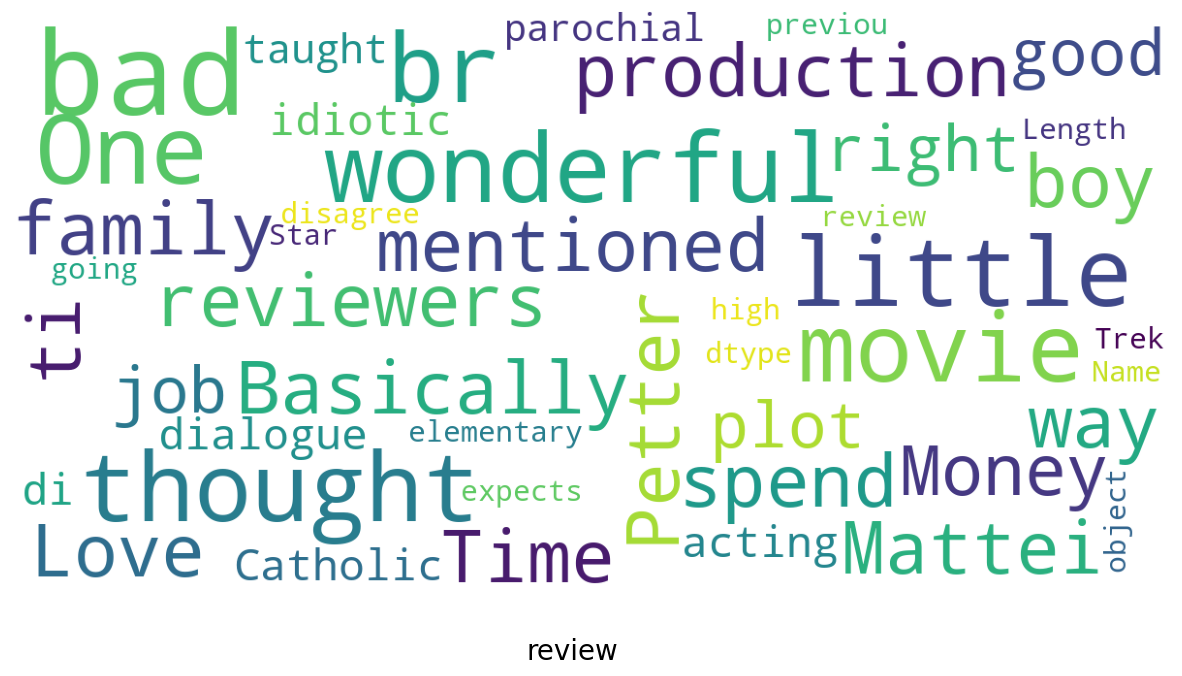

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
  wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=200,
      max_font_size=40,
      scale=3,
      random_state=42
  ).generate(str(data))

  fig = plt.figure(1, figsize=(15, 15))
  plt.axis('off')

  if title:
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(df['review'], title='review')

In [14]:
# pip install wordcloud

* tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs
)

In [15]:
txtVec = TextVectorization()

txtVec.adapt(df['review'])

In [16]:
txtVec.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'from',
 'who',
 'so',
 'like',
 'or',
 'just',
 'her',
 'about',
 'if',
 'has',
 'out',
 'some',
 'there',
 'what',
 'good',
 'when',
 'more',
 'very',
 'my',
 'even',
 'no',
 'up',
 'would',
 'she',
 'time',
 'only',
 'which',
 'really',
 'their',
 'see',
 'were',
 'story',
 'had',
 'can',
 'me',
 'than',
 'we',
 'much',
 'well',
 'been',
 'get',
 'will',
 'other',
 'do',
 'great',
 'also',
 'into',
 'bad',
 'because',
 'people',
 'how',
 'most',
 'first',
 'him',
 'dont',
 'then',
 'movies',
 'made',
 'them',
 'make',
 'films',
 'could',
 'any',
 'way',
 'too',
 'after',
 'characters',
 'think',
 'watch',
 'many',
 'seen',
 'being',
 'two',
 'character',
 'never',
 'love',
 'acting',
 'where',
 'did',
 'plot'

In [23]:
textsize = txtVec.vocabulary_size()

In [19]:
txtVec(df['review']).numpy()

array([[  29,    5,    2, ...,    0,    0,    0],
       [   4,  385,  116, ...,    0,    0,    0],
       [  10,  195,   11, ...,    0,    0,    0],
       ...,
       [  10,  227,    4, ...,    0,    0,    0],
       [ 142,  162,    6, ...,    0,    0,    0],
       [  56,   29, 5827, ...,    0,    0,    0]])

In [20]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [21]:
txtVec

In [26]:
print(df['review'].dtypes)
print(df['sentiment'].dtypes)

object
object


In [27]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 토큰화 및 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

# 패딩
maxlen = max(len(s) for s in sequences)  # 가장 긴 리뷰의 길이를 사용하거나, 원하는 길이를 설정할 수 있습니다.
data = pad_sequences(sequences, maxlen=maxlen)

* GRU

In [29]:
modelGRU = Sequential()

modelGRU.add(tf.keras.Input(shape=(1,), dtype=tf.string))
modelGRU.add(txtVec)
modelGRU.add(Embedding(textsize, 2))
modelGRU.add(GRU(32))
modelGRU.add(BatchNormalization())
modelGRU.add(Dense(4, activation = 'relu'))
modelGRU.add(Dense(1, activation = 'sigmoid'))


In [39]:
modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=2)

gru_history = modelGRU.fit(df['review'], df['sentiment'], batch_size=128, validation_split=0.2,
             epochs=20, callbacks=[earlyStopping])


Epoch 1/20
313/313 [==============================] - 72s 222ms/step - loss: 0.6787 - accuracy: 0.5587 - val_loss: 18.8913 - val_accuracy: 0.5007
Epoch 2/20
313/313 [==============================] - 68s 219ms/step - loss: 0.3017 - accuracy: 0.8794 - val_loss: 1.6491 - val_accuracy: 0.7463
Epoch 3/20
313/313 [==============================] - 67s 216ms/step - loss: 0.1597 - accuracy: 0.9419 - val_loss: 5.3960 - val_accuracy: 0.5315
Epoch 4/20
313/313 [==============================] - 2421s 8s/step - loss: 0.0964 - accuracy: 0.9675 - val_loss: 9.3305 - val_accuracy: 0.5067


In [34]:
lossFun = gru_history.history['loss']
accFun = gru_history.history['accuracy']
vallossFun = gru_history.history['val_loss']
valaccFun = gru_history.history['val_accuracy']

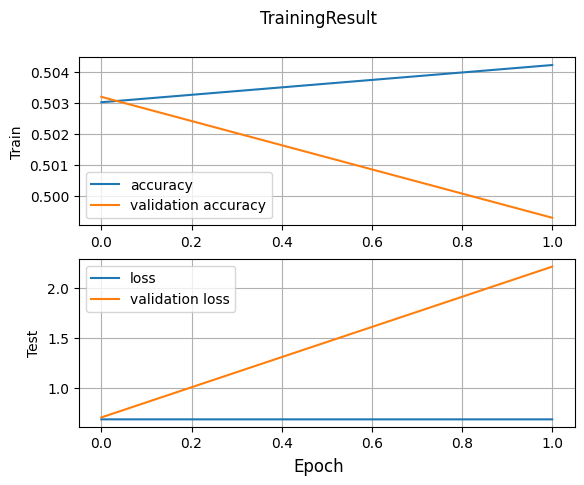

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun, label='accuracy')
ax1.plot(valaccFun, label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun, label='loss')
ax2.plot(vallossFun, label='validation loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()

In [45]:
modelLSTM = Sequential()

modelLSTM.add(tf.keras.Input(shape=(1,), dtype=tf.string))
modelLSTM.add(txtVec)
modelLSTM.add(Embedding(textsize, 2))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Dense(4, activation = 'relu'))
modelLSTM.add(Dense(1, activation = 'sigmoid'))


In [46]:
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=1)

LSTM_history = modelLSTM.fit(df['review'], df['sentiment'], batch_size=128, validation_split=0.2,
             epochs=20, callbacks=[earlyStopping])


Epoch 1/20
313/313 [==============================] - 73s 224ms/step - loss: 0.6936 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 2/20
313/313 [==============================] - 81s 258ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 3/20
313/313 [==============================] - 72s 231ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 4/20
313/313 [==============================] - 72s 230ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6929 - val_accuracy: 0.5023
Epoch 5/20
313/313 [==============================] - 71s 227ms/step - loss: 0.6928 - accuracy: 0.5019 - val_loss: 0.6929 - val_accuracy: 0.5002
Epoch 6/20
313/313 [==============================] - 71s 226ms/step - loss: 0.6923 - accuracy: 0.4998 - val_loss: 0.6927 - val_accuracy: 0.5023
Epoch 7/20
 41/313 [==>...........................] - ETA: 56s - loss: 0.6914 - accuracy: 0.5086

KeyboardInterrupt: 

In [ ]:
lossFun = LSTM_history.history['loss']
accFun = LSTM_history.history['accuracy']
vallossFun = LSTM_history.history['val_loss']
valaccFun = LSTM_history.history['val_accuracy']

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun, label='accuracy')
ax1.plot(valaccFun, label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun, label='loss')
ax2.plot(vallossFun, label='validation loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()

Global average

In [ ]:
modelGAP = Sequential()

modelGAP.add(tf.keras.Input(shape=(1,), dtype=tf.string))
modelGAP.add(txtVec)
modelGAP.add(Embedding(textsize, 2))
modelGAP.add(GlobalAveragePooling1D())
modelGAP.add(Dense(128, activation = 'relu'))
modelGAP.add(Dropout(0.1))
modelGAP.add(BatchNormalization())
modelGAP.add(Dense(32, activation = 'relu'))
modelGAP.add(Dropout(0.1))
modelGAP.add(Dense(1, activation = 'sigmoid'))


In [ ]:
modelGAP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=1)

GAP_history = modelGAP.fit(df['review'], df['sentiment'], batch_size=128, validation_split=0.2,
             epochs=5, callbacks=[earlyStopping])


In [ ]:
lossFun = GAP_history.history['loss']
accFun = GAP_history.history['accuracy']
vallossFun = GAP_history.history['val_loss']
valaccFun = GAP_history.history['val_accuracy']

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun, label='accuracy')
ax1.plot(valaccFun, label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun, label='loss')
ax2.plot(vallossFun, label='validation loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()